# K-MEANS UNSUPERVISED

# IMPORTO LIBRERIAS

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.cluster import KMeans
from pickle import dump

import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

# IMPORTO DATOS Y LOS TRATO

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
import os
df.to_csv('./data/processed/housing.csv', index=False)

pillo solo las variables con las que voy a trabajar

In [9]:
df = df[['MedInc', 'Latitude', 'Longitude']]
df.head(3)

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24


In [12]:
# divido dataset traintest
X_train, X_test = train_test_split(df, test_size=0.2, random_state=25)
X_train.head(3)

,MedInc,Latitude,Longitude
14105,1.0617,32.75,-117.10
20250,3.2847,34.24,-119.18
5191,1.5256,33.93,-118.26


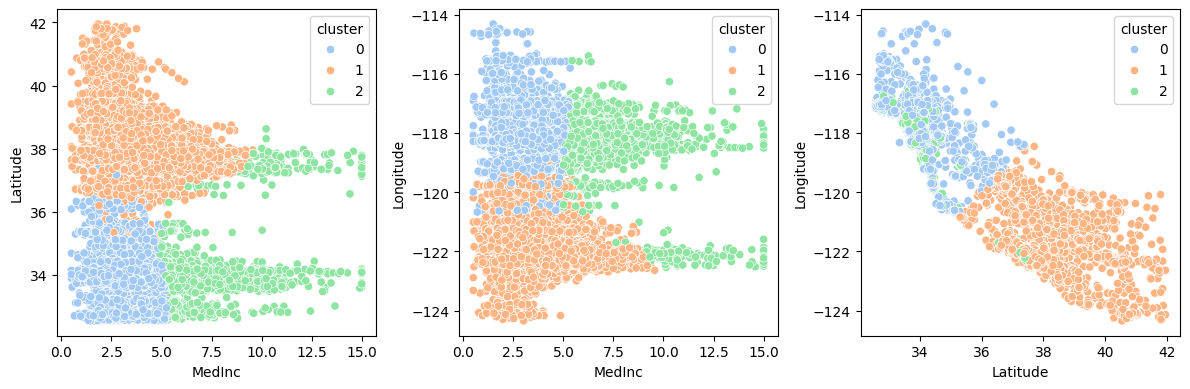

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=25)
X_train['cluster'] = kmeans.fit_predict(X_train)
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
sns.scatterplot(ax=ax[0], data=X_train, x='MedInc', y='Latitude', hue='cluster', palette='pastel')
sns.scatterplot(ax=ax[1], data=X_train, x='MedInc', y='Longitude', hue='cluster', palette='pastel')
sns.scatterplot(ax=ax[2], data=X_train, x='Latitude', y='Longitude', hue='cluster', palette='pastel')
plt.tight_layout()
plt.show()

In [16]:
X_test['cluster'] = kmeans.predict(X_test)
X_test.head(3)

,MedInc,Latitude,Longitude,cluster
73,0.4999,37.81,-122.29,1
8944,2.9167,34.01,-118.47,0
3737,3.4013,34.17,-118.40,0


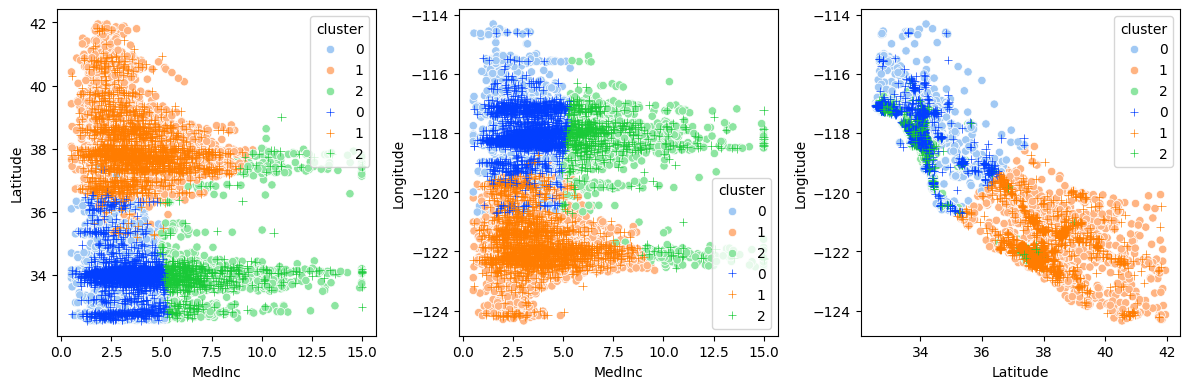

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (12, 4))
sns.scatterplot(ax= ax[0], data = X_train, x = 'MedInc', y='Latitude', palette='pastel', hue='cluster')
sns.scatterplot(ax = ax[1], data = X_train, x = 'MedInc', y='Longitude', palette='pastel', hue='cluster')
sns.scatterplot(ax = ax[2], data = X_train, x = 'Latitude', y='Longitude', palette='pastel', hue='cluster')
sns.scatterplot(ax= ax[0], data = X_test, x = 'MedInc', y='Latitude', hue='cluster', palette='bright', marker='+')
sns.scatterplot(ax = ax[1], data = X_test, x = 'MedInc', y='Longitude', hue='cluster', palette='bright',marker='+')
sns.scatterplot(ax = ax[2], data = X_test, x = 'Latitude', y='Longitude', hue='cluster', palette='bright',marker='+')
plt.tight_layout()
plt.show()

# SUPERVISADO

In [18]:
y_train = X_train['cluster']
X_train = X_train.drop(columns='cluster')
y_test = X_test['cluster']
X_test = X_test.drop(columns='cluster')

In [19]:
supv_models = {
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=123), 
    'RandomForestClassifier': RandomForestClassifier(random_state=123), 
    'XGBClassifier': XGBClassifier(random_state=123, device='cuda')
}

results = []

for name, model in supv_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred
    dump(model, open(f"../models/{name}_model.sav", "wb"))
    results.append(
        {
            'Model': name, 
            'Accuracy': accuracy_score(y_test, y_pred)
        }
    )

results = sorted(results, key=lambda x: x['Accuracy'], reverse=True)
bmodel = results[0].get('Model')
best_accuracy = results[0].get('Accuracy')

print(f'Our best model is {bmodel} with an accuracy of {round(best_accuracy*100,2)}%')

Our best model is XGBClassifier with an accuracy of 99.83%
